
# Kowshik P 

## ML Clustering assignment submitted on 02-May-2022
## -----------------------------------------------------------------------------
## Model Implemented - OPTICS and Random Forest
## Metric - Confusion Matrix (Accuracy_score)
## Accuracy Rate of Model : 0.91
## Type - 1 error: 2
## Type - 2 error: 4 
## Performance - Good
## -----------------------------------------------------------------------------


In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as mat;


In [2]:
dataset = pd.read_csv("Mall_Customers.csv");

dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
independent = dataset.iloc[:, [3, 4]].values;

#independent

In [5]:
from sklearn.cluster import OPTICS;

#from itertools import cycle;

#colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk");



#from sklearn.datasets import make_blobs;
#make_blobs(independent);

#import scipy.cluster.hierarchy as sch;

#sch.make_blobs(independent);

for values in range(1, 11):
    opts = OPTICS(min_samples = values);
    opts.fit(independent);

#mat.plot(range(1, 11), colors);
#mat.title("Estimated No.of Clusters");
#mat.show()





C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [6]:
from sklearn.cluster import OPTICS;

opts = OPTICS(min_samples = values);

y_opts = opts.fit_predict(independent);
 
y_opts

array([-1,  3,  0,  3, -1,  3,  0, -1,  0,  3,  0, -1,  0,  3,  0,  3, -1,
        3, -1, -1, -1,  3,  0,  3,  0,  3, -1, -1, -1,  3,  0,  3,  0,  3,
        0,  3,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  2,  1,  1, -1,  2,  1,
       -1, -1, -1, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, -1,  2,
        2,  2,  2, -1, -1, -1,  5, -1, -1,  4,  5,  4,  5, -1, -1,  4, -1,
        4,  5,  4,  5,  4, -1, -1, -1,  4, -1, -1,  5, -1, -1,  4, -1,  4,
        5,  4, -1,  4,  5,  4,  5, -1,  5,  4, -1, -1,  5, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
supervised = pd.DataFrame(dataset);

supervised["Cluster_Group"] = y_opts;

supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [8]:
supervised.to_csv("cluster_csv", index = False);

C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


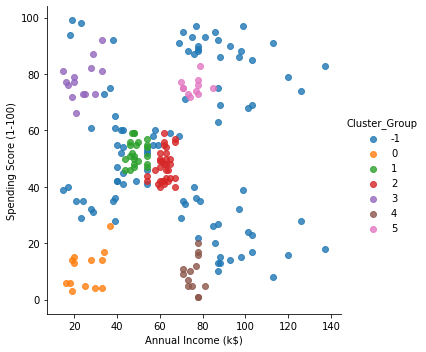

In [9]:
import seaborn as sns;

facet = sns.lmplot(data = supervised, x = supervised.columns[3], y = supervised.columns[4], hue = supervised.columns[5], 
          fit_reg = False, legend = True, legend_out = True);

In [10]:
dependent = supervised.iloc[:,[5]].values;

In [11]:
from sklearn.model_selection import train_test_split;

x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 1/3, random_state = 9);

In [12]:
from sklearn.preprocessing import StandardScaler;

standardization = StandardScaler();

x_train = standardization.fit_transform(x_train);

x_test = standardization.transform(x_test);


In [13]:
from sklearn.ensemble import RandomForestClassifier;

randomForestClassifier = RandomForestClassifier();

randomForestClassifier.fit(x_train, y_train);


C:\Users\hp\Anaconda3\envs\virtualml\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [14]:
y_pred = randomForestClassifier.predict(x_test);

In [15]:
from sklearn.metrics import confusion_matrix;

randamForestConfusionMatrix = confusion_matrix(y_test, y_pred);

print(randamForestConfusionMatrix);


[[29  0  0  0  1  0  1]
 [ 1  3  0  0  0  0  0]
 [ 2  0  6  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 1  0  0  0  8  0  0]
 [ 0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  1]]


In [16]:
from sklearn.metrics import classification_report;

randamForestClassifierReport = classification_report(y_test, y_pred);

print(randamForestClassifierReport);

              precision    recall  f1-score   support

          -1       0.88      0.94      0.91        31
           0       1.00      0.75      0.86         4
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         8
           3       0.89      0.89      0.89         9
           4       1.00      1.00      1.00         6
           5       0.50      1.00      0.67         1

    accuracy                           0.91        67
   macro avg       0.90      0.90      0.88        67
weighted avg       0.92      0.91      0.91        67



# Metric(Accuracy Score)
## The best performance is 1

In [17]:
from sklearn.metrics import accuracy_score;

RandomForestClassifierAccuracy = accuracy_score(y_test, y_pred);

print(RandomForestClassifierAccuracy)

0.9104477611940298
